<a href="https://colab.research.google.com/github/klinkzsweet/PCVK_Genap_2023/blob/main/TaskWeek5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


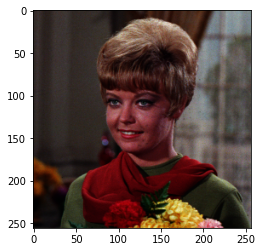

In [43]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img_f = cv.imread('/content/drive/MyDrive/PCVK/images/female.tiff')
img_rgb = cv.cvtColor(img_f,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
plt.imshow(img_rgb)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 5


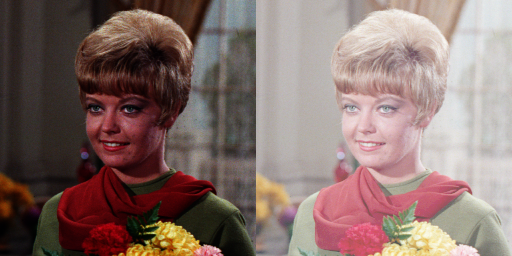

In [44]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try: 
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.cvtColor(img_rgb,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)
     
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

 Simulasi Image Depth 
----------------------
Masukkan nilai bit depth: 2


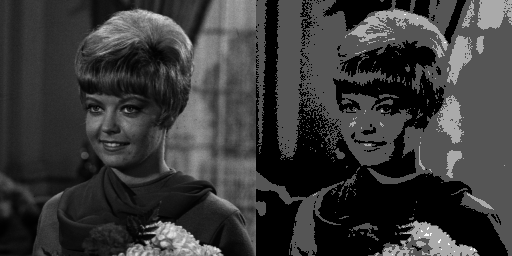

In [45]:
print(' Simulasi Image Depth ')
print('----------------------')
try:
  bd = float(input('Masukkan nilai bit depth: '))
except ValueError:
  print('Error, not a number')

bit = 2**bd
level = 255 / (bit - 1)
original = cv.imread("/content/drive/MyDrive//PCVK/images/female.tiff", cv.IMREAD_GRAYSCALE)

bit_depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
       bit_depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255)

final_frame = cv.hconcat((original, bit_depth_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 5
Nilai PSNR = 27.52923266480311 dB
Nilai MSE: 114.85690104166666


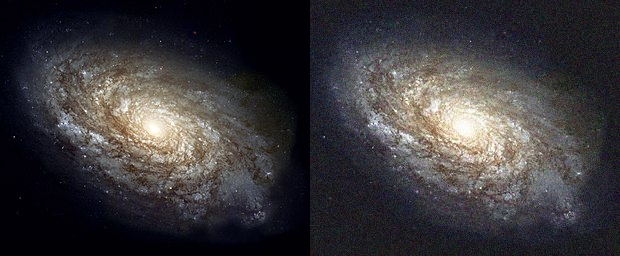

In [46]:
#Jumlah Citra 5
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[0]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(4):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 5')
print('Nilai PSNR =', psnr, 'dB')
mse_value = np.mean((original - compressed) ** 2)
print('Nilai MSE:',mse_value)

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 30
Nilai PSNR = 27.519720420733616 dB
Nilai MSE: 115.10874495967742


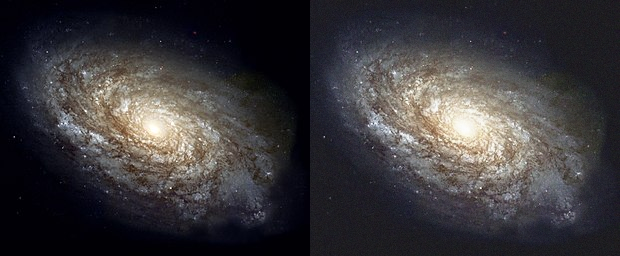

In [47]:
#Jumlah Citra 30
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[29]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(29):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 30')
print('Nilai PSNR =', psnr, 'dB')
mse_value = np.mean((original - compressed) ** 2)
print('Nilai MSE:',mse_value)

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 60
Nilai PSNR = 27.495542551538826 dB
Nilai MSE: 115.75136088709678


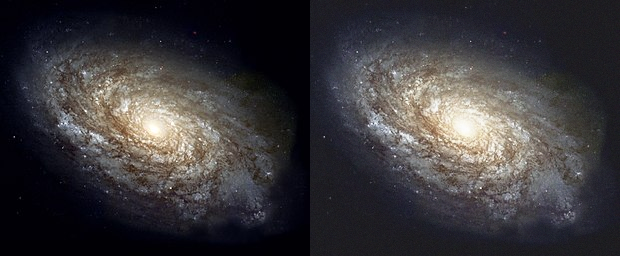

In [48]:
#Jumlah Citra 60
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[59]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(59):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 60')
print('Nilai PSNR =', psnr, 'dB')
mse_value = np.mean((original - compressed) ** 2)
print('Nilai MSE:',mse_value)

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 80
Nilai PSNR = 27.510329060631538 dB
Nilai MSE: 115.35793010752688


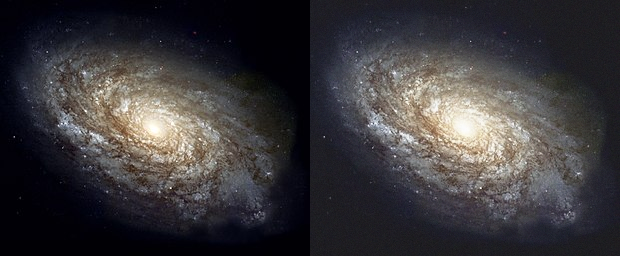

In [49]:
#Jumlah Citra 80
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[79]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(79):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 80')
print('Nilai PSNR =', psnr, 'dB')
mse_value = np.mean((original - compressed) ** 2)
print('Nilai MSE:',mse_value)

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

Jumlah Citra di Average = 30
Nilai PSNR = 27.513144843253862 dB
Nilai MSE: 115.28316112231182


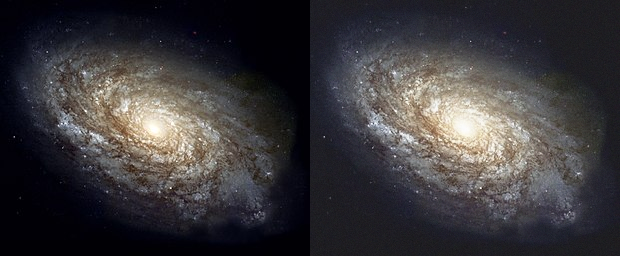

In [50]:
#Jumlah Citra 100
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

noise_image = cv_img[99]

#index (array) gambar pada folder noises dimulai dari 0
for i in range(99):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE 0 maka tidak ada noise sama sekali, sehingga PSNR tidak memiliki arti
 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr 
  
compressed = noise_image
psnr = PSNR(original, compressed)
print('Jumlah Citra di Average = 30')
print('Nilai PSNR =', psnr, 'dB')
mse_value = np.mean((original - compressed) ** 2)
print('Nilai MSE:',mse_value)

final_frame = cv.hconcat((original, noise_image))
cv2_imshow(final_frame)

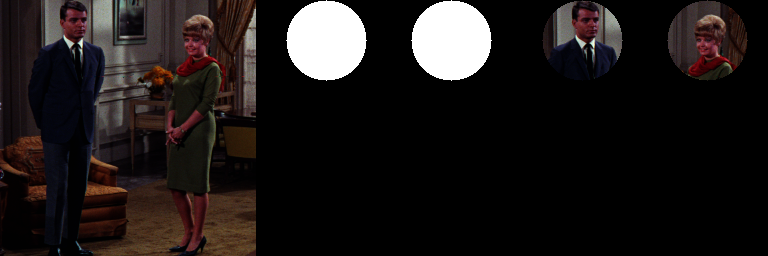

In [57]:
img_t = cv.imread('/content/drive/MyDrive/PCVK/images/couple.tiff')

mask = np.zeros(img_t.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

result = img_t & mask

mask1 = cv.circle(mask, (195, 40), 40, (255,255,255), -1)

result = img_t & mask1

final_frame = cv.hconcat((img_t, mask, result))
cv2_imshow(final_frame)

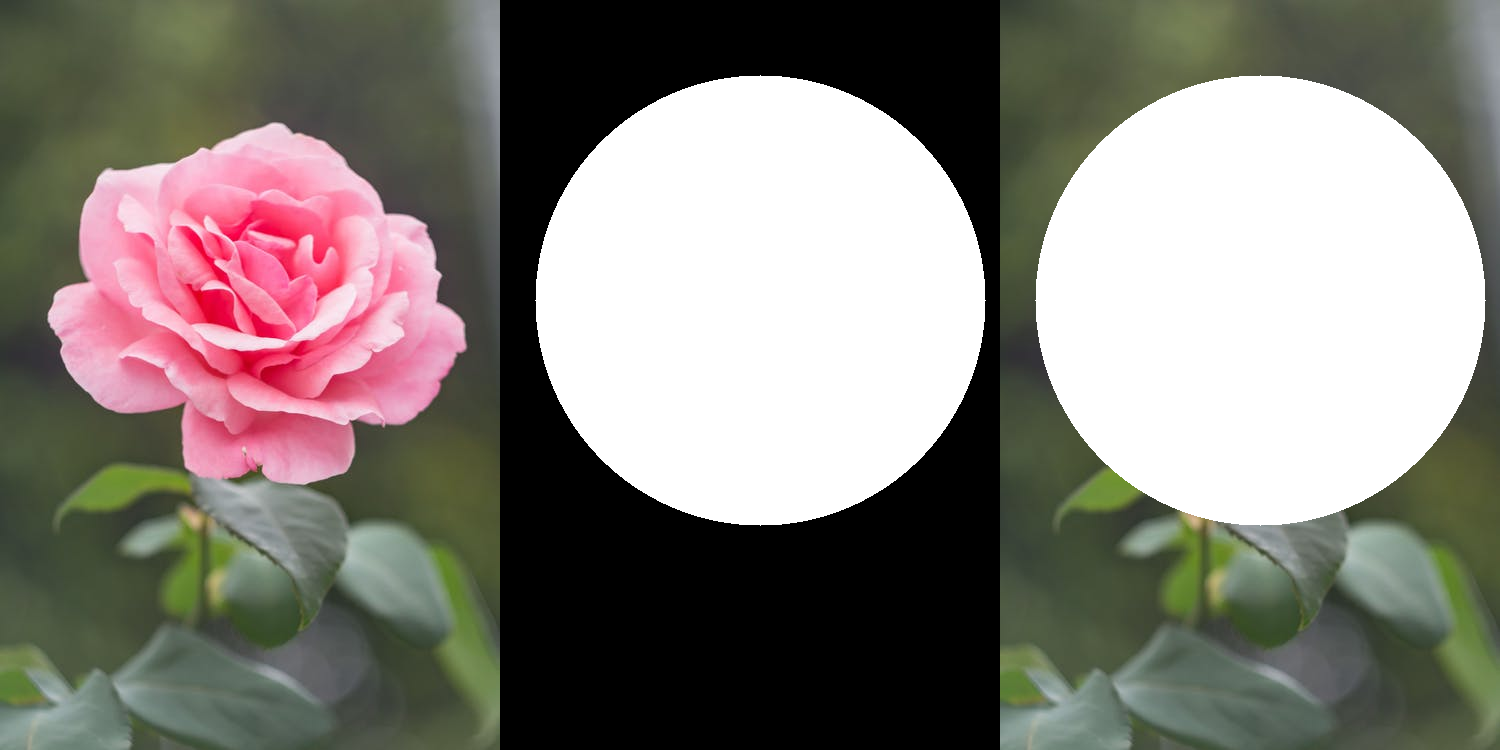

In [64]:
#OR
original = cv.imread('/content/drive/MyDrive/PCVK/images/rose_pink.png')

mask_or = np.zeros(original.shape, dtype=np.uint8)
mask_or = cv.circle(mask_or, (260, 300), 225, (255,255,255), -1)

masked_output = original | mask_or

final_frame = cv.hconcat((original, mask_or, masked_output))
cv2_imshow(final_frame)

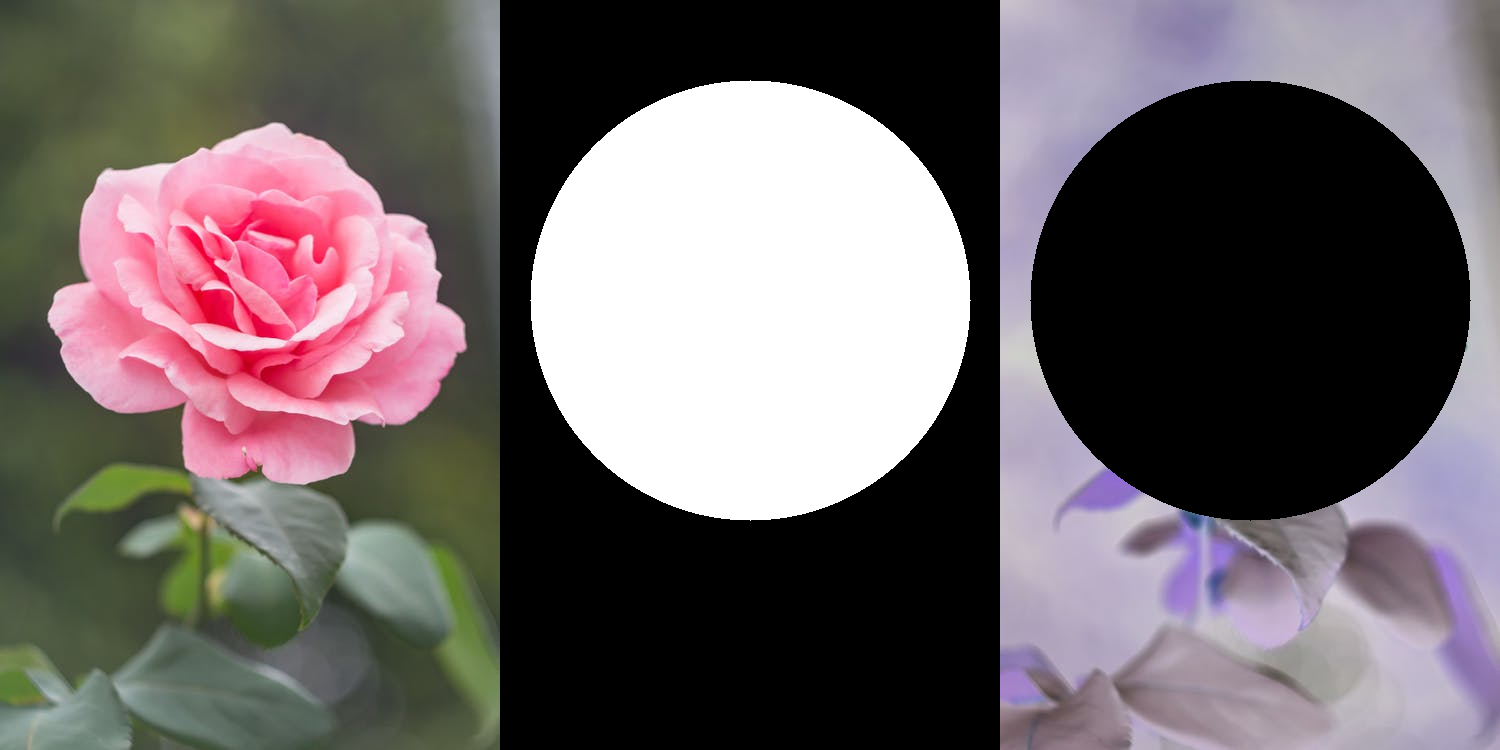

In [65]:
#NOT
original = cv.imread('/content/drive/MyDrive/PCVK/images/rose_pink.png')

mask_not = np.zeros(original.shape, dtype=np.uint8)
mask_not = cv.circle(mask_not, center = (250, 300), radius=220, color=(255,255,255), thickness=-1)

masked_output = ~original & ~mask_not

final_frame = cv.hconcat((original, mask_not, masked_output))
cv2_imshow(final_frame)

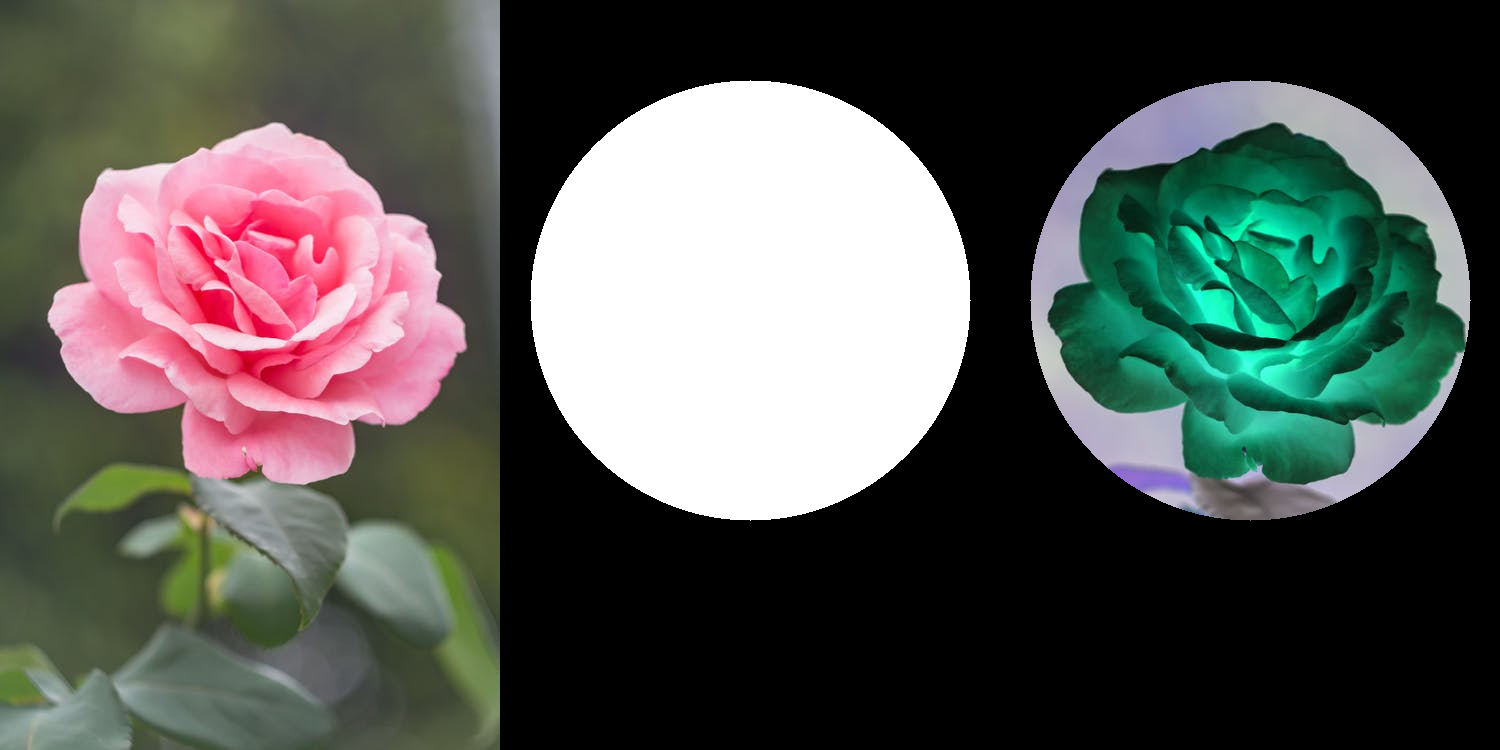

In [66]:
#NAND
original = cv.imread('/content/drive/MyDrive/PCVK/images/rose_pink.png')

mask_nand = np.zeros(original.shape, dtype=np.uint8)
mask_nand = cv.circle(mask_nand, center = (250, 300), radius=220, color=(255,255,255), thickness=-1)

masked_output = ~original & mask_nand

final_frame = cv.hconcat((original, mask_nand, masked_output))
cv2_imshow(final_frame)

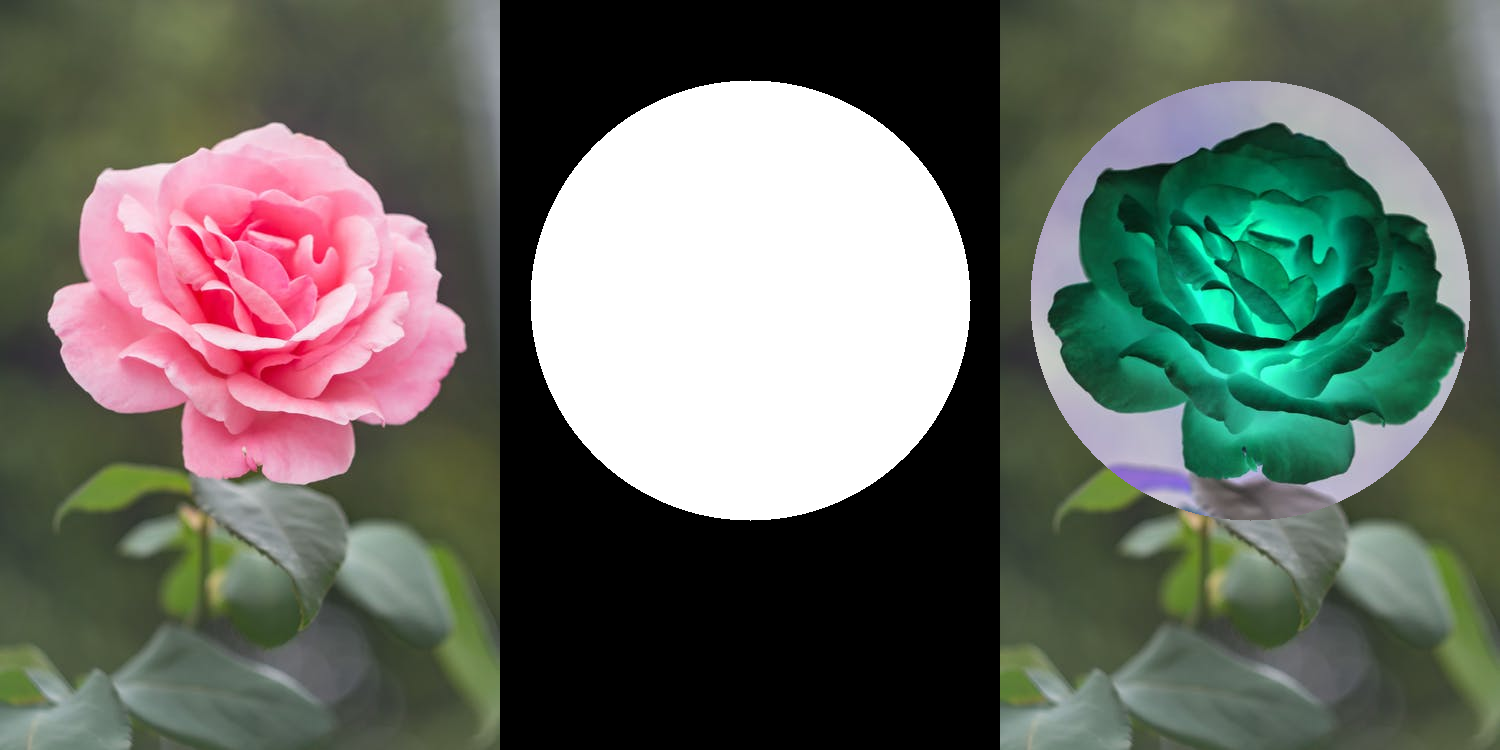

In [67]:
#XOR
original = cv.imread('/content/drive/MyDrive/PCVK/images/rose_pink.png')

mask_xor = np.zeros(original.shape, dtype=np.uint8)
mask_xor = cv.circle(mask_xor, center = (250, 300), radius=220, color=(255,255,255), thickness=-1)

masked_output = original ^ mask_xor

final_frame = cv.hconcat((original, mask_xor, masked_output))
cv2_imshow(final_frame)